<a href="https://colab.research.google.com/github/Da-Heon/Record_DataAnalysis/blob/main/cohort_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코호트

- 1. 시간 기반 코호트
- 2. 행동 기반 코호트
- 3. 인구 통계학적 코호트

In [ ]:
import pandas as pd
import numpy as np
import random

## 1. 시간 기반 코호트

In [ ]:
np.random.randint(100, 500, 500)

array([304, 345, 219, 113, 225, 242, 489, 250, 304, 142, 342, 480, 318,
       446, 391, 152, 194, 423, 450, 174, 238, 138, 277, 220, 127, 363,
       365, 365, 215, 355, 374, 162, 470, 489, 480, 475, 459, 469, 255,
       145, 128, 119, 305, 132, 495, 235, 150, 275, 304, 185, 316, 131,
       297, 151, 289, 235, 308, 428, 303, 391, 179, 227, 224, 478, 488,
       182, 451, 374, 132, 479, 334, 376, 186, 355, 346, 262, 371, 406,
       379, 197, 486, 111, 238, 281, 222, 193, 496, 114, 169, 264, 482,
       130, 321, 151, 163, 306, 301, 316, 254, 126, 467, 439, 449, 294,
       387, 374, 380, 438, 162, 240, 102, 182, 279, 470, 121, 410, 222,
       145, 489, 131, 417, 179, 475, 371, 117, 322, 139, 149, 298, 455,
       265, 291, 154, 311, 287, 437, 181, 331, 237, 242, 138, 286, 164,
       484, 450, 218, 145, 348, 342, 358, 378, 282, 111, 165, 255, 142,
       412, 130, 486, 117, 409, 384, 147, 409, 202, 263, 348, 200, 180,
       378, 110, 321, 353, 270, 245, 270, 162, 402, 344, 466, 40

In [ ]:
date_range = pd.date_range(
    start='2024-01-01', periods=500, freq='D'
    ).tolist()

In [ ]:
random.sample(date_range, 500)

[Timestamp('2024-05-21 00:00:00'),
 Timestamp('2025-04-07 00:00:00'),
 Timestamp('2024-04-09 00:00:00'),
 Timestamp('2024-02-22 00:00:00'),
 Timestamp('2025-04-12 00:00:00'),
 Timestamp('2024-07-06 00:00:00'),
 Timestamp('2024-11-07 00:00:00'),
 Timestamp('2025-01-16 00:00:00'),
 Timestamp('2024-11-12 00:00:00'),
 Timestamp('2024-01-09 00:00:00'),
 Timestamp('2025-03-04 00:00:00'),
 Timestamp('2024-01-27 00:00:00'),
 Timestamp('2024-05-16 00:00:00'),
 Timestamp('2024-11-11 00:00:00'),
 Timestamp('2024-02-15 00:00:00'),
 Timestamp('2024-04-04 00:00:00'),
 Timestamp('2024-05-12 00:00:00'),
 Timestamp('2024-08-04 00:00:00'),
 Timestamp('2024-10-05 00:00:00'),
 Timestamp('2024-10-09 00:00:00'),
 Timestamp('2025-03-27 00:00:00'),
 Timestamp('2025-03-16 00:00:00'),
 Timestamp('2024-03-31 00:00:00'),
 Timestamp('2024-01-08 00:00:00'),
 Timestamp('2025-01-02 00:00:00'),
 Timestamp('2024-12-04 00:00:00'),
 Timestamp('2024-09-05 00:00:00'),
 Timestamp('2024-05-20 00:00:00'),
 Timestamp('2024-09-

In [ ]:
data = {
    'customer_id': range(1, 501),
    'signup_date': random.sample(date_range, 500),
    'total_payment': np.random.randint(100, 500, 500)
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.head()

,customer_id,signup_date,total_payment
0,1,2024-11-01,483
1,2,2024-06-01,491
2,3,2024-05-06,446
3,4,2025-02-08,342
4,5,2025-01-11,475


In [ ]:
df['signup_based_cohort'] = df['signup_date'].dt.to_period('M')

In [ ]:
df.head(1)

,customer_id,signup_date,total_payment,signup_based_cohort
0,1,2024-11-01,483,2024-11


In [ ]:
monthly_cohort = df[df['signup_based_cohort'] == '2024-04']

In [ ]:
monthly_cohort.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 20 to 494
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_id          30 non-null     int64         
 1   signup_date          30 non-null     datetime64[ns]
 2   total_payment        30 non-null     int64         
 3   signup_based_cohort  30 non-null     period[M]     
dtypes: datetime64[ns](1), int64(2), period[M](1)
memory usage: 1.2 KB


## 2. 행동 기반 코호트

In [ ]:
data = {
    'customer_id': np.random.randint(1, 100, 500),
    'order_date': random.sample(date_range, 500),
    'product_id': [np.random.choice([101, 102, 103, 104, 105]) for i in range(500)],
    'total_payment': np.random.randint(100, 500, 500)
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    500 non-null    int64         
 1   order_date     500 non-null    datetime64[ns]
 2   product_id     500 non-null    int64         
 3   total_payment  500 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 15.8 KB


In [ ]:
df.head()

,customer_id,order_date,product_id,total_payment
0,62,2024-03-06,102,240
1,85,2025-04-27,102,106
2,71,2025-02-18,101,400
3,10,2024-02-27,103,244
4,2,2025-01-18,101,356


In [ ]:
first_purchase = df.groupby('customer_id')['order_date'].min().reset_index()

In [ ]:
first_purchase.rename(columns={
    'order_date': 'first_purchase_date'
}, inplace=True)

In [ ]:
first_purchase.head(1)

,customer_id,first_purchase_date
0,1,2024-09-04


In [ ]:
first_product_df = first_purchase.merge(df,
                     left_on=['customer_id', 'first_purchase_date'],
                     right_on=['customer_id', 'order_date'],
                     how='left')

In [ ]:
first_product_df.head()

,customer_id,first_purchase_date,order_date,product_id,total_payment
0,1,2024-09-04,2024-09-04,105,183
1,2,2024-01-13,2024-01-13,103,294
2,3,2024-01-20,2024-01-20,102,287
3,4,2024-03-09,2024-03-09,101,382
4,5,2024-03-10,2024-03-10,105,215


In [ ]:
first_product_df[['customer_id', 'product_id']].head()

,customer_id,product_id
0,1,105
1,2,103
2,3,102
3,4,101
4,5,105


## 3. 인구 통계학적 코호트

In [ ]:
data = {
    'customer_id': range(1, 101),
    'age': np.random.randint(18, 70, 100),
    'gender': np.random.choice(['Male', 'Female'], 100),
    'total_payment': np.random.randint(100, 1000, 100)
}

In [ ]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    100 non-null    int64 
 1   age            100 non-null    int64 
 2   gender         100 non-null    object
 3   total_payment  100 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.3+ KB


In [ ]:
df.head()

,customer_id,age,gender,total_payment
0,1,64,Female,587
1,2,37,Female,133
2,3,54,Male,439
3,4,56,Female,177
4,5,30,Female,358


In [ ]:
df.describe()

,customer_id,age,total_payment
count,100.000000,100.000000,100.000000
mean,50.500000,42.370000,554.350000
std,29.011492,14.575928,260.584594
min,1.000000,18.000000,107.000000
25%,25.750000,30.000000,345.750000
50%,50.500000,40.000000,573.000000
75%,75.250000,55.000000,775.250000
max,100.000000,69.000000,986.000000


In [ ]:
age_list=[]

for i in df['age']:
    if  20 > i >= 10:
        x = '10s'
        age_list.append(x)
    elif 30 > i >= 20:
        x = '20s'
        age_list.append(x)
    elif 40 > i >= 30:
        x = '40s'
        age_list.append(x)
    elif 50 > i >= 40:
        x = '50s'
        age_list.append(x)
    else:
        x = '60s'
        age_list.append(x)

df['age_s'] = age_list

In [ ]:
# 나잇대를 범주화 해주세요!
# 10s, 20s, 30s, 40s, 50s, 60s

df['age_group'] = pd.cut(
    df['age'],
    bins=[0, 20, 30, 40, 50, 60, 70],
    labels=['10s', '20s', '30s', '40s', '50s', '60s'],
    right=False
    )

In [ ]:
df.head()

,customer_id,age,gender,total_payment,age_group
0,1,64,Female,587,60s
1,2,37,Female,133,30s
2,3,54,Male,439,50s
3,4,56,Female,177,50s
4,5,30,Female,358,30s


In [ ]:
df['cohort'] = df.apply(lambda x: f"{x['age_group']}_{x['gender']}", axis=1)

In [ ]:
df.head()

,customer_id,age,gender,total_payment,age_group,cohort
0,1,64,Female,587,60s,60s_Female
1,2,37,Female,133,30s,30s_Female
2,3,54,Male,439,50s,50s_Male
3,4,56,Female,177,50s,50s_Female
4,5,30,Female,358,30s,30s_Female


In [ ]:
df[df['cohort'] == '50s_Male']

,customer_id,age,gender,total_payment,age_group,cohort
2,3,54,Male,439,50s,50s_Male
7,8,55,Male,912,50s,50s_Male
14,15,55,Male,935,50s,50s_Male
49,50,54,Male,341,50s,50s_Male
50,51,52,Male,443,50s,50s_Male
59,60,55,Male,891,50s,50s_Male
64,65,56,Male,654,50s,50s_Male
77,78,58,Male,862,50s,50s_Male
80,81,58,Male,125,50s,50s_Male
81,82,53,Male,795,50s,50s_Male


## 4. 코호트 분석 실습

### transform 메서드

In [ ]:
data = {
    'customer_id': [1, 1, 2, 2],
    'purchase_date': ['2024-01-01', '2024-03-01', '2025-01-01', '2025-03-01']
}

df = pd.DataFrame(data)
df['purchase_date'] = pd.to_datetime(df['purchase_date'])
df

,customer_id,purchase_date
0,1,2024-01-01
1,1,2024-03-01
2,2,2025-01-01
3,2,2025-03-01


In [ ]:
# 고객별로 최소의 값만 요약하여, 고객별 첫 구매 날짜를 표시합니다.
df.groupby('customer_id')['purchase_date'].min()

,purchase_date
customer_id,
1,2024-01-01
2,2025-01-01


In [ ]:
# 고객별 첫 구매 날짜를 계산하고,
# 원본 데이터프레임의 각 행에 고객의 첫 구매 날짜를 반복하여 동일한 형태의 Series로 반환합니다.
df.groupby('customer_id')['purchase_date'].transform('min')

,purchase_date
0,2024-01-01
1,2024-01-01
2,2025-01-01
3,2025-01-01


In [ ]:
df['first_purchase_date'] = df.groupby('customer_id')['purchase_date'].transform('min')

In [ ]:
df

,customer_id,purchase_date,first_purchase_date
0,1,2024-01-01,2024-01-01
1,1,2024-03-01,2024-01-01
2,2,2025-01-01,2025-01-01
3,2,2025-03-01,2025-01-01


### 코호트 분석 ㄱㄱ

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [ ]:
n_customers = 500
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
date_range = (end_date - start_date).days
date_range

365

In [ ]:
data = {
    'customer_id': np.random.choice(range(1, n_customers+1), size=1000),
    'purchase_date': [
        start_date + timedelta(days=np.random.randint(date_range))
        for _ in range(1000)],
    'purchase_amount': np.random.uniform(100, 1000, size=1000)
}

In [ ]:
df = pd.DataFrame(data)
df.head()

,customer_id,purchase_date,purchase_amount
0,461,2024-10-18,649.399030
1,330,2024-06-09,212.813046
2,359,2024-03-17,223.137168
3,480,2024-08-19,606.259899
4,381,2024-03-13,543.421695


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   purchase_date    1000 non-null   datetime64[ns]
 2   purchase_amount  1000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 23.6 KB


In [ ]:
df.describe()

,customer_id,purchase_date,purchase_amount
count,1000.000000,1000,1000.000000
mean,245.635000,2024-06-27 01:40:47.999999744,550.526035
min,2.000000,2024-01-01 00:00:00,100.337117
25%,120.750000,2024-03-22 18:00:00,333.973987
50%,242.500000,2024-06-20 12:00:00,550.072110
75%,373.000000,2024-09-28 06:00:00,769.358264
max,499.000000,2024-12-30 00:00:00,999.006735
std,144.829871,NaN,257.458133


In [ ]:
# 시간 기반 코호트 설정
df['cohort'] = df['purchase_date'].apply(lambda x: x.replace(day=1))

In [ ]:
df.head()

,customer_id,purchase_date,purchase_amount,cohort
0,461,2024-10-18,649.399030,2024-10-01
1,330,2024-06-09,212.813046,2024-06-01
2,359,2024-03-17,223.137168,2024-03-01
3,480,2024-08-19,606.259899,2024-08-01
4,381,2024-03-13,543.421695,2024-03-01


In [ ]:
# 상황가정: 우리한테 필요한건 정확한 날짜보다는, 년-월 정보가 필요합니다.
df['first_purchase_date'] = df.groupby('customer_id')['purchase_date'].transform('min').apply(lambda x: x.replace(day=1))

In [ ]:
df.head()

,customer_id,purchase_date,purchase_amount,cohort,first_purchase_date
0,461,2024-10-18,649.399030,2024-10-01,2024-08-01
1,330,2024-06-09,212.813046,2024-06-01,2024-06-01
2,359,2024-03-17,223.137168,2024-03-01,2024-03-01
3,480,2024-08-19,606.259899,2024-08-01,2024-02-01
4,381,2024-03-13,543.421695,2024-03-01,2024-03-01


- 코호트별 월별 지표 계산
    - 1. 날짜 컬럼에서 연도와 월 추출
    - 2. 연도 차이를 월 단위로 환산
    - 3. 월 차이 계산
        - 두 날짜 사이의 월 차이
    - 4. 전체 경과 개월 수 계산
        - 연도 차이를 월로 환산한 값과 월 차이를 더하면,
        - 두 날짜 사이의 전체 경과 개월 수가 나옵니다.
        - 예를 들어, 첫 구매 날짜가 2023-03-15이고, 코호트 날짜가 2023-07-10
            - 연도 차이: 2023 - 2023 = 0 (0개월)
            - 월 차이: 7 - 3 = 4 (4개월)
            - 즉, 총 4개월이 지난 것으로 계산됩니다.

In [ ]:
# 1, 2번
year_calc = (df['cohort'].dt.year - df['first_purchase_date'].dt.year) * 12

In [ ]:
# 3번
month_calc = df['cohort'].dt.month - df['first_purchase_date'].dt.month

In [ ]:
# 4번
df['months_since_first_purchase'] = year_calc + month_calc

In [ ]:
# 고객이 첫 구매한 이후로 몇 개월이 지났는지를 정량적으로 표기
df.head()

,customer_id,purchase_date,purchase_amount,cohort,first_purchase_date,months_since_first_purchase
0,461,2024-10-18,649.399030,2024-10-01,2024-08-01,2
1,330,2024-06-09,212.813046,2024-06-01,2024-06-01,0
2,359,2024-03-17,223.137168,2024-03-01,2024-03-01,0
3,480,2024-08-19,606.259899,2024-08-01,2024-02-01,6
4,381,2024-03-13,543.421695,2024-03-01,2024-03-01,0


In [ ]:
# 코호트별로 그룹화하고,
# 각 그룹별로 고객 수와 구매 금액의 총합을 계산

cohort_data = df.groupby(
    ['first_purchase_date', 'months_since_first_purchase']
).agg(
    n_customers=('customer_id', 'nunique'),
    total_purchase=('purchase_amount', 'sum')
).reset_index()

In [ ]:
# 코호트 피벗 테이블
cohort_pivot = cohort_data.pivot_table(
    index='first_purchase_date',
    columns='months_since_first_purchase',
    values='n_customers'
)

In [ ]:
cohort_pivot

months_since_first_purchase,0,1,2,3,4,5,6,7,8,9,10,11
first_purchase_date,,,,,,,,,,,,
2024-01-01,86.0,13.0,13.0,12.0,11.0,12.0,10.0,14.0,10.0,16.0,13.0,16.0
2024-02-01,66.0,16.0,9.0,15.0,9.0,13.0,9.0,11.0,10.0,9.0,9.0,NaN
2024-03-01,60.0,5.0,16.0,8.0,11.0,10.0,6.0,6.0,9.0,8.0,NaN,NaN
2024-04-01,42.0,8.0,9.0,7.0,6.0,8.0,6.0,5.0,9.0,NaN,NaN,NaN
2024-05-01,45.0,4.0,5.0,8.0,4.0,7.0,7.0,6.0,NaN,NaN,NaN,NaN
2024-06-01,29.0,5.0,4.0,4.0,2.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN
2024-07-01,21.0,3.0,3.0,2.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-01,17.0,2.0,1.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-09-01,17.0,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 리텐션 차트
# 중요: 시작 기준점
cohort_start = cohort_pivot.iloc[:, 0]

In [ ]:
rentention_matrix = np.round(cohort_pivot.divide(cohort_start, axis=0) * 100, 2)

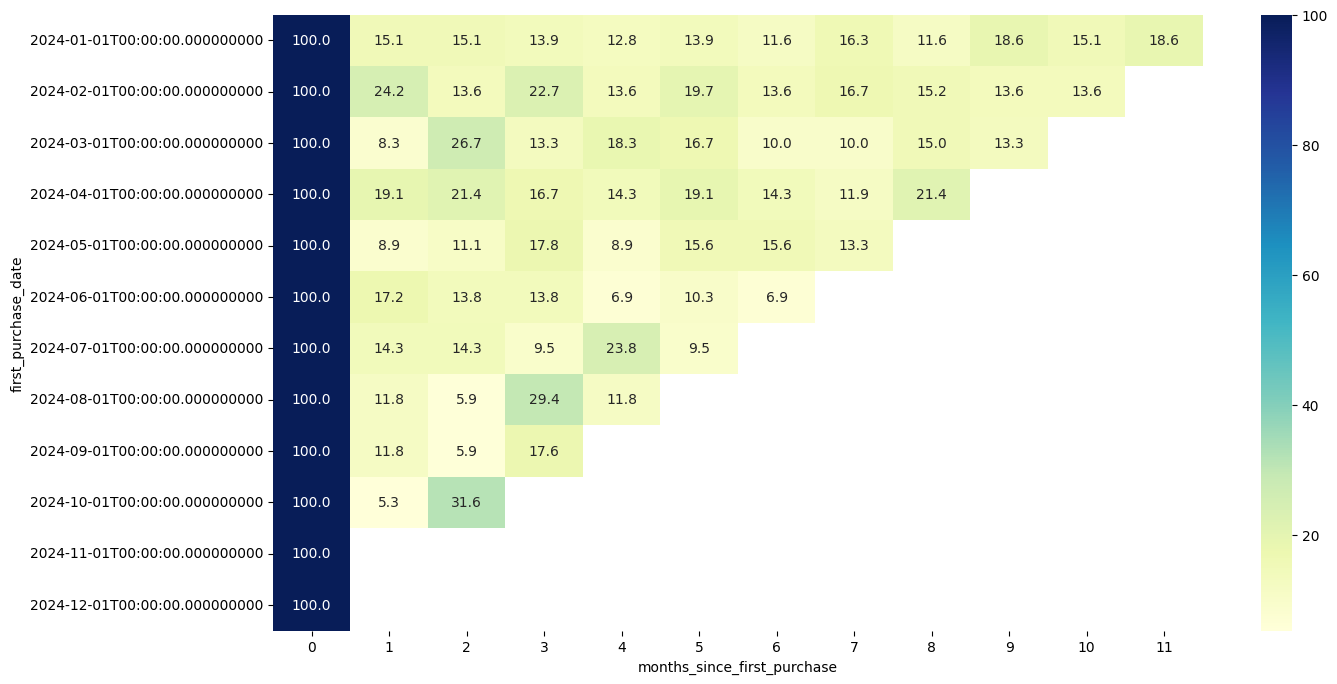

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))ㅇ
sns.heatmap(rentention_matrix, annot=True, fmt=".1f", cmap='YlGnBu')
plt.show()

- 월별로 첫 구매를 한 사용자 코호트에 대해서
- 각 코호트가 몇 개월 후에도 활동(구매)를 지속하는 비율
- 각 값은 해당 코호트에서 첫 구매 후 특정 개월 수가 지난 시점까지 남아 있는(다시 구매) 사용자 비율
- 2024년 10월 첫 구매를 한 코호트의 1개월 차 리텐션: 5.3%